In [60]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
#bank=filename='D://Data Science/Python/worked/bank-full.csv'
bank=pd.read_csv('D://Data Science/Python/worked/bank-full.csv',sep =";")
bank.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


No None values
Transform Categorical value to numeric
other than contact, day, month

In [62]:
job= {'admin':0, 'unknown':1,'unemployed':2,'mapnagement':3,'housemaid':4,
     'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,
     'retiredt':9,'technician':10,'services':11}
bank['job']= bank['job'].map(job)

marital= {'married':0, 'divorced':1,'single':2}
bank['marital']= bank['marital'].map(marital)

education= {'unknown':0, 'primary':1,'secondary':2,'tertiary':3}
bank['education']= bank['education'].map(education)

default= {'yes':0, 'no':1}
bank['default']= bank['default'].map(default)

housing= {'yes':0, 'no':1}
bank['housing']= bank['housing'].map(housing)

outcome= {'unknown':0, 'success':1,'failure':2}
bank['poutcome']= bank['poutcome'].map(outcome)

subscribed= {'yes':0, 'no':1}
bank['y']= bank['y'].map(subscribed)

In [66]:
common_value='3'
bank.poutcome.fillna(common_value, inplace = True)

common_value='12'
bank.job.fillna(common_value, inplace = True)

In [67]:
bank.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,12,0,3,1,2143,0,no,unknown,5,may,261,1,-1,0,0,1
1,44,10,2,2,1,29,0,no,unknown,5,may,151,1,-1,0,0,1
2,33,5,0,2,1,2,0,yes,unknown,5,may,76,1,-1,0,0,1
3,47,7,0,0,1,1506,0,no,unknown,5,may,92,1,-1,0,0,1
4,33,1,2,0,1,1,1,no,unknown,5,may,198,1,-1,0,0,1
5,35,12,0,3,1,231,0,no,unknown,5,may,139,1,-1,0,0,1
6,28,12,2,3,1,447,0,yes,unknown,5,may,217,1,-1,0,0,1
7,42,5,1,3,0,2,0,no,unknown,5,may,380,1,-1,0,0,1
8,58,12,0,1,1,121,0,no,unknown,5,may,50,1,-1,0,0,1
9,43,10,2,2,1,593,0,no,unknown,5,may,55,1,-1,0,0,1


In [68]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 5.9+ MB


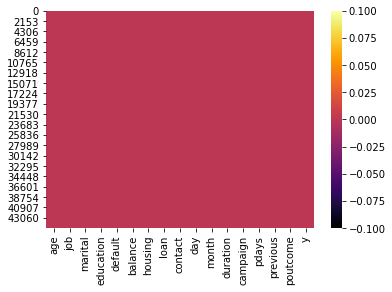

In [69]:
sns.heatmap(bank.isnull(),cmap='inferno')

In [70]:
bank.corr()

,age,marital,education,default,balance,housing,day,duration,campaign,pdays,previous,y
age,1.000000,-0.376104,-0.173615,0.017879,0.097783,0.185513,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.025155
marital,-0.376104,1.000000,0.137510,-0.009584,-0.020602,0.020202,-0.007701,0.022895,-0.029121,0.029490,0.015676,-0.065668
education,-0.173615,0.137510,1.000000,0.009035,0.050572,0.038689,0.021661,0.002554,0.000194,0.007092,0.025295,-0.051341
default,0.017879,-0.009584,0.009035,1.000000,0.066745,-0.006025,-0.009424,0.010021,-0.016822,0.029979,0.018329,-0.022419
balance,0.097783,-0.020602,0.050572,0.066745,1.000000,0.068768,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.052838
housing,0.185513,0.020202,0.038689,-0.006025,0.068768,1.000000,0.027982,-0.005075,0.023599,-0.124178,-0.037076,-0.139173
day,-0.009120,-0.007701,0.021661,-0.009424,0.004503,0.027982,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.028348
duration,-0.004648,0.022895,0.002554,0.010021,0.021560,-0.005075,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.394521
campaign,0.004760,-0.029121,0.000194,-0.016822,-0.014578,0.023599,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.073172
pdays,-0.023758,0.029490,0.007092,0.029979,0.003435,-0.124178,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.103621


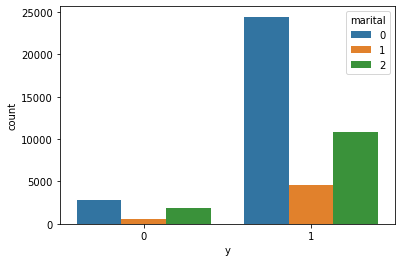

In [71]:
sns.countplot(x='y',hue='marital',data=bank)

In [76]:
bank.describe()

,age,marital,education,default,balance,housing,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.680963,2.060516,0.981973,1362.272058,0.444162,15.806419,258.163080,2.763841,40.197828,0.580323,0.883015
std,10.618762,0.884908,0.778704,0.133049,3044.765829,0.496878,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,1.000000,72.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,0.000000,2.000000,1.000000,448.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,2.000000,3.000000,1.000000,1428.000000,1.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
sns.catplot(x='pclass',y='fare',data=bank, kind='box')